In [52]:

from PIL import Image
import cv2
import os
import pandas as pd
import imageio as iio
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import Augmentor


In [53]:
#os.path.join(dir, folder) for folder in next(os.walk(dir))[1]

# print(next(os.walk(dir))[1])
os.walk('./datasets/cub200_cropped/train_cropped/')


<generator object walk at 0x0000022CFD39C270>

In [54]:
path = 'D:/Repsonsible_ai/CUB_200_2011/'

In [55]:
images = pd.read_csv((path + 'images.txt'), sep=' ', names=['img_id', 'filepath'])
print(images.head())

   img_id                                           filepath
0       1  001.Black_footed_Albatross/Black_Footed_Albatr...
1       2  001.Black_footed_Albatross/Black_Footed_Albatr...
2       3  001.Black_footed_Albatross/Black_Footed_Albatr...
3       4  001.Black_footed_Albatross/Black_Footed_Albatr...
4       5  001.Black_footed_Albatross/Black_Footed_Albatr...


In [56]:
image_class_labels = pd.read_csv(os.path.join(path+'/image_class_labels.txt'), sep=' ', names=['img_id', 'target'])

In [57]:
train_test_split = pd.read_csv(os.path.join(path+'/train_test_split.txt'), sep=' ', names=['img_id', 'is_training_img'])

In [58]:
train_test_split.head()

,img_id,is_training_img
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [59]:
data = images.merge(image_class_labels, on='img_id')

In [60]:
data = data.merge(train_test_split, on='img_id')

In [61]:
print(data.loc[0]['filepath'].split('/')[0])
print(data.loc[0]['filepath'])

001.Black_footed_Albatross
001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg


In [62]:
img = Image.open(os.path.join(path +'/images/' + data['filepath'][0]))

In [63]:
img1 = cv2.imread(os.path.join(path +'/images/' + data['filepath'][0]))

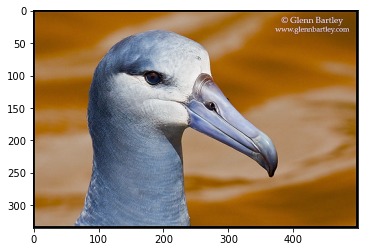

In [64]:
plt.imshow(img1)

In [65]:
bounding_box = pd.read_csv(os.path.join(path+'/bounding_boxes.txt'), sep=' ', names=['x', 'y', 'w', 'h'])

In [66]:
bounding_box.head()

,x,y,w,h
1,60.0,27.0,325.0,304.0
2,139.0,30.0,153.0,264.0
3,14.0,112.0,388.0,186.0
4,112.0,90.0,255.0,242.0
5,70.0,50.0,134.0,303.0


In [67]:
def center_crop (img, output_size, center=None, scale=None):
    """
    Args
    - img: np.ndarray. img.shape=[height,width,3].
    - output_size: tuple or list. output_size=[height, width].
    - center: tuple or list. center=[x,y].
                If cenetr is None, use input image center.
    - scale: float.
                If scale is None, do not scale up the boundary.
    """
    hi,wi = img.shape[:2]
    ho,wo = output_size
    if center:
        x,y = center
        if scale:
            ho *= scale
            wo *= scale
            if ho > hi or wo > wi:
                ho,wo = output_size
        if ho > hi or wo > wi:
            ho = min([hi,wi])
            wo = min([hi,wi])
        bound_left  = int(x - wo/2)
        bound_right = int(x + wo/2)
        bound_top   = int(y - ho/2)
        bound_bottom= int(y + ho/2)

        if bound_left < 0:
            offset_w = 0
        elif bound_right > wi:
            offset_w = int(wi-wo)
        else:
            offset_w = int(x - wo/2)

        if bound_top < 0:
            offset_h = 0
        elif bound_bottom > hi:
            offset_h = int(hi-ho)
        else:
            offset_h = int(y - ho/2)
    else:
        if scale:
            print ("Scaling deny when center variable is None.")
        try:
            if hi < ho and wi < wo:
                raise ValueError("image is too small. use orginal image.")
        except:
            ho = min([hi,wi])
            wo = ho
        offset_h = int((hi - ho) / 2)
        offset_w = int((wi - wo) / 2)
    return img[offset_h : offset_h + int(ho),
                offset_w : offset_w + int(wo)]

In [68]:
arr = np.asarray(img)
print(arr.shape)
print(img1.shape)

(335, 500, 3)
(335, 500, 3)


In [69]:
print([bounding_box.iloc[0][0]])
print(bounding_box.iloc[0][0:2])
x,y = bounding_box.iloc[0][0:2]

[60.0]
x    60.0
y    27.0
Name: 1, dtype: float64


In [70]:
im = center_crop(arr, output_size = [bounding_box.iloc[0][2], bounding_box.iloc[0][3]], center = [bounding_box.iloc[0][0], bounding_box.iloc[0][1]])

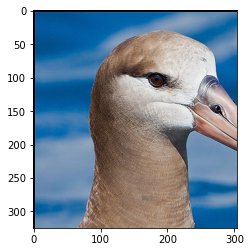

In [71]:
plt.imshow(im)

In [84]:
p = Augmentor.Pipeline(source_directory='./test/')

Initialised with 1 image(s) found.
Output directory set to ./test/output.

In [85]:
p.rotate(probability=1, max_left_rotation=15, max_right_rotation=15)
    
p.flip_left_right(probability=0.5)

In [86]:
p.process()

Processing <PIL.Image.Image image mode=RGB size=320x223 at 0x22CFB32D790>: 100%|██████████| 1/1 [00:00<00:00, 43.49 Samples/s]
